In [2]:
library(WGCNA)
library(dplyr)

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
options(stringsAsFactors = FALSE)
# 读数据框时，字符不会当成factor
femData <- read.csv("LiverFemale3600.csv")
str(femData)

'data.frame':	3600 obs. of  143 variables:
 $ substanceBXH  : chr  "MMT00000044" "MMT00000046" "MMT00000051" "MMT00000076" ...
 $ gene_symbol   : chr  "1700007N18Rik" "Mast2" "Ankrd32" "0" ...
 $ LocusLinkID   : int  69339 17776 105377 383154 16826 216453 11637 12534 233400 66614 ...
 $ ProteomeID    : int  286025 157466 321939 0 157383 0 173308 156645 345545 284307 ...
 $ cytogeneticLoc: chr  "0" "0" "0" "0" ...
 $ CHROMOSOME    : int  16 4 13 16 5 10 4 10 7 3 ...
 $ StartPosition : int  50911260 115215318 74940309 49345114 43546124 1337265 127906666 71217407 67950095 90134331 ...
 $ EndPosition   : int  50912491 115372404 74982847 49477048 43613704 1347607 127924174 71232018 68137775 90147211 ...
 $ F2_2          : num  -0.0181 -0.0773 -0.0226 -0.00924 -0.0487 0.176 0.0768 -0.148 0.0687 0.0609 ...
 $ F2_3          : num  0.0642 -0.0297 0.0617 -0.145 0.0582 -0.189 0.186 0.177 0.101 0.0557 ...
 $ F2_14         : num  6.44e-05 1.12e-01 -1.29e-01 2.87e-02 -4.83e-02 -6.50e-02 2.14e-01 -1.

In [4]:
#! 将文件进行转置并修改行名和列名
datExpr0 <- as.data.frame(t(femData[, -c(1:8)]))
# 填充对应的基因ID
names(datExpr0) <- femData$substanceBXH
# 修改样本名称
rownames(datExpr0) <- names(femData)[-c(1:8)]
head(datExpr0)

,MMT00000044,MMT00000046,MMT00000051,MMT00000076,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,MMT00000212,⋯,MMT00082822,MMT00082828,MMT00082829,MMT00082832,MMT00082847,MMT00082850,MMT00082869,MMT00082877,MMT00082899,MMT00082906
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F2_2,-0.0181000,-0.0773,-0.02260000,-0.00924,-0.04870000,0.17600000,0.07680000,-0.14800000,0.06870000,0.06090000,⋯,0.0135000,-0.15400000,-0.0218000,0.0310000,0.1290000,0.0467000,0.00991000,0.0291000,-0.00927,0.0436000
F2_3,0.0642000,-0.0297,0.06170000,-0.14500,0.05820000,-0.18900000,0.18600000,0.17700000,0.10100000,0.05570000,⋯,-0.0097100,-0.07410000,0.0900000,0.0106000,0.1130000,-0.0252000,0.03190000,0.0408000,-0.12100,0.0827000
F2_14,0.0000644,0.1120,-0.12900000,0.02870,-0.04830000,-0.06500000,0.21400000,-0.13200000,0.10900000,0.19100000,⋯,0.0709000,-0.13900000,0.0277000,-0.1310000,0.2550000,-0.1230000,0.08800000,0.0892000,-0.11400,-0.0872000
F2_15,-0.0580000,-0.0589,0.08710000,-0.04390,-0.03710000,-0.00846000,0.12000000,0.10700000,-0.00858000,-0.12100000,⋯,-0.0313000,-0.07250000,0.0178000,0.0882000,0.0790000,0.0002760,-0.04820000,0.0493000,-0.05010,-0.0390000
F2_19,0.0483000,0.0443,-0.11500000,0.00425,0.02510000,-0.00574000,0.02100000,-0.11900000,0.10500000,0.05410000,⋯,0.0695000,-0.11500000,0.0618000,0.2950000,0.1270000,-0.0560000,-0.02890000,-0.0389000,0.00718,0.0710000
F2_20,-0.1519741,-0.0938,-0.06502607,-0.23610,0.08504274,-0.01807182,0.06222751,-0.05497686,-0.02441415,0.06343181,⋯,0.1743492,-0.09405315,0.1176646,0.1161963,0.1180381,-0.1171272,-0.09774204,-0.0745188,0.31857,0.2047701


In [5]:
gsg = goodSamplesGenes(datExpr0, verbose = 3);
#* 如果值为TRUE则表示所有基因都pass了
gsg$allOK 

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

In [6]:
if (!gsg$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg$goodGenes)>0)
printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
if (sum(!gsg$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}

In [8]:
#TODO  异常值处理
sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.
sizeGrWindow(12,9)
#pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))

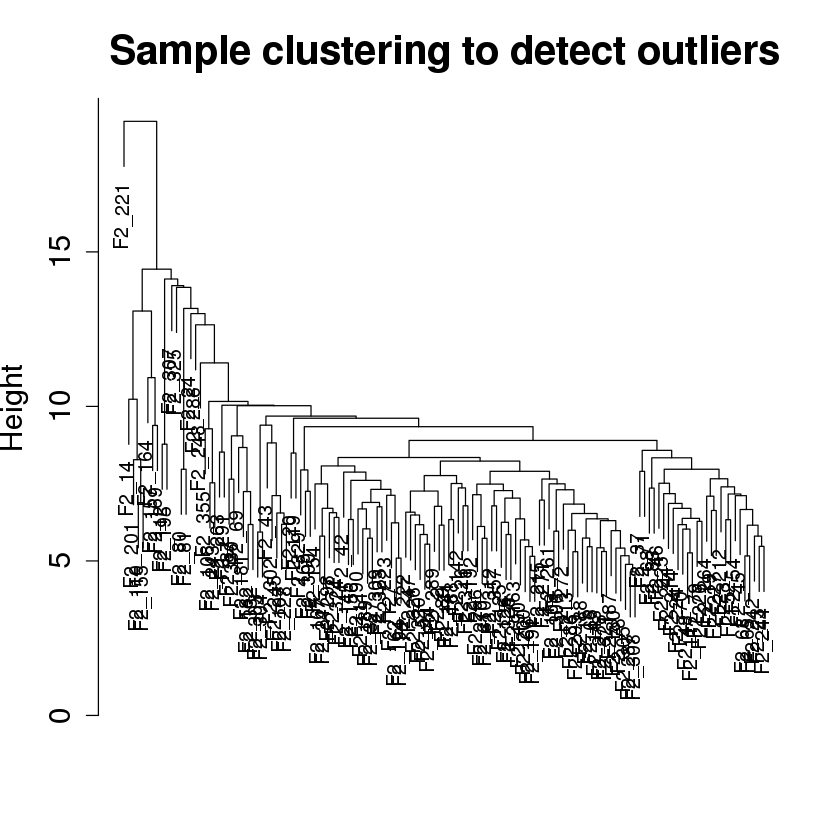

In [9]:
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
cex.axis = 1.5, cex.main = 2) 

In [10]:
clust = cutreeStatic(sampleTree, cutHeight = 15, minSize = 10)
keepSamples = (clust==1)
datExpr = datExpr0[keepSamples, ]

In [12]:
#* 构建共表达网络
enableWGCNAThreads()


Allowing parallel execution with up to 19 working processes.


In [40]:
#* 对于每个阈值，分别调用拓扑分析函数
powers = c(seq(4,10,by=1), seq(12,20, by=2));
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
#* 执行垃圾回收，防止内存溢出
collectGarbage();

pickSoftThreshold: will use block size 3600.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3600 of 3600
   Power SFT.R.sq slope truncated.R.sq mean.k. median.k. max.k.
1      4    0.506 -1.42          0.973   56.50   47.2000  202.0
2      5    0.681 -1.72          0.940   32.20   25.1000  134.0
3      6    0.902 -1.50          0.962   19.90   14.5000   94.8
4      7    0.921 -1.67          0.917   13.20    8.6800   84.1
5      8    0.904 -1.72          0.876    9.25    5.3900   76.3
6      9    0.859 -1.70          0.836    6.80    3.5600   70.5
7     10    0.833 -1.66          0.831    5.19    2.3800   65.8
8     12    0.853 -1.48          0.911    3.33    1.1500   58.1
9     14    0.876 -1.38          0.949    2.35    0.5740   51.9
10    16    0.907 -1.30          0.970    1.77    0.3090   46.8
11    18    0.912 -1.24          0.973    1.39    0.1670   42.5
12    20    0.931 -1.21          0.977    1.14    0.0951   38.7


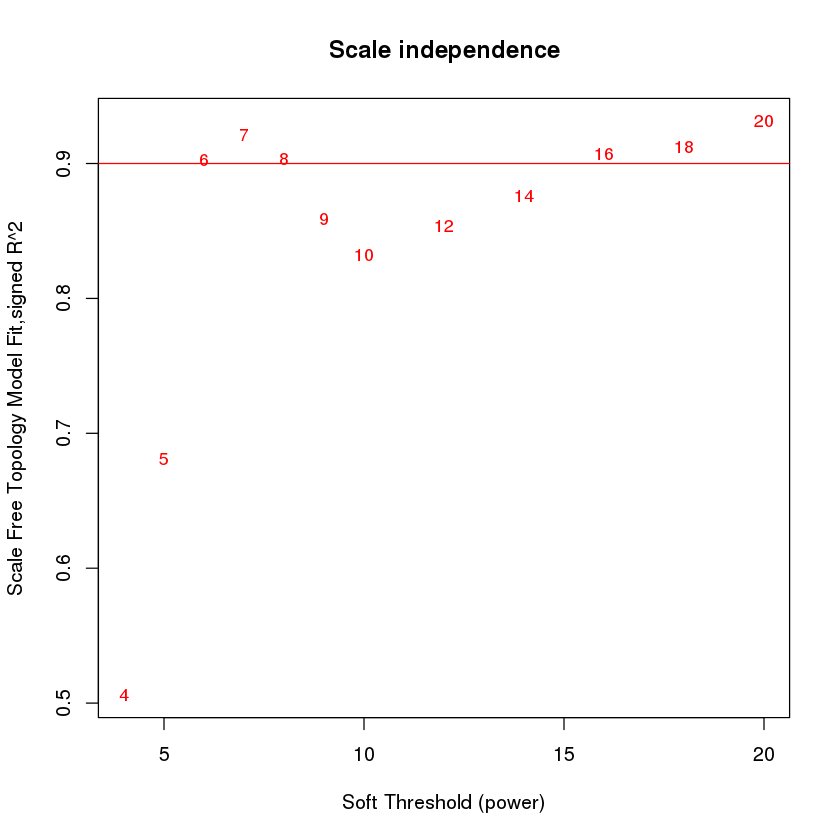

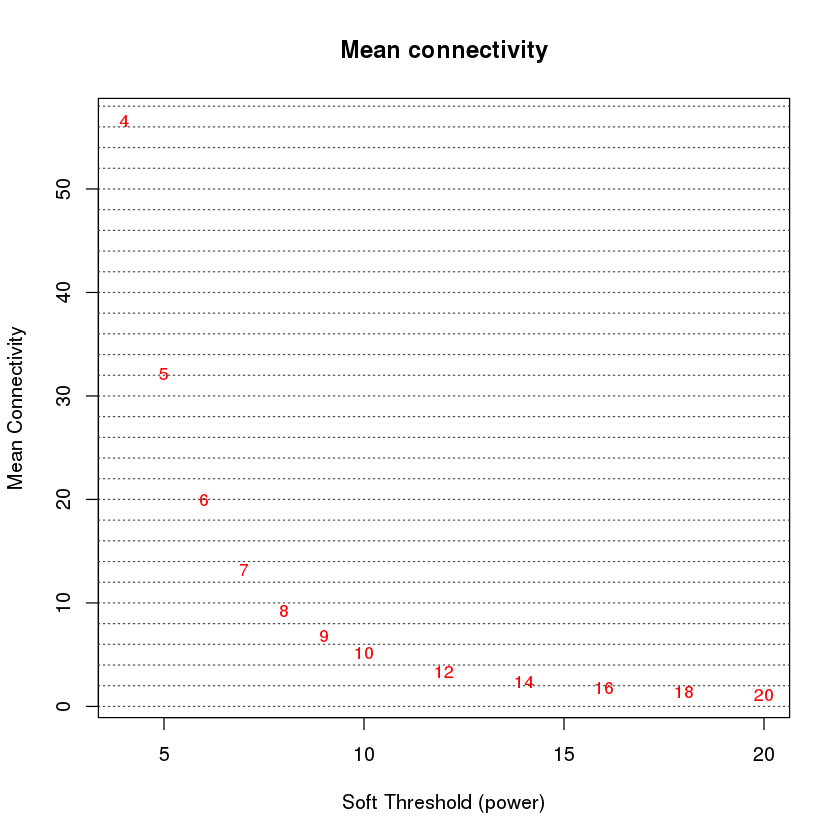

In [42]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")
addGrid();

In [44]:
#------------------------------------------------
# TODO 一步到位
#------------------------------------------------
net=blockwiseModules(
    datExpr = datExpr,
    power = 6,
    TOMType = "unsigned",
    minModuleSize = 30,
    reassignThreshold = 0,
    mergeCutHeight = 0.25,
    numericLabels = TRUE,
    pamRespectsDendro = FALSE,
    saveTOMs = TRUE,
    saveTOMFileBase = "femaleMouseTOM",
    verbose = 3
)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
Cluster size 3600 broken into 2108 1492 
Cluster size 2108 broken into 1126 982 
Done cluster 1126 
Done cluster 982 
Done cluster 2108 
Done cluster 1492 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 19 parallel threads.
     Fraction of slow calculations: 0.353455
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file femaleMouseTOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
     ..removing 1 genes from module 1 because their KME is too low.
     ..removing 1 genes from module 7 because their KME is too low.
     ..removing 1 genes from module 8 because their KME is too low.
     ..removing 1 genes from module 21 because their KME is too low.
 ..merging modules that 

In [58]:
# open a graphics window
sizeGrWindow(12, 9)
# Convert labels to colors for plotting
mergedColors = labels2colors(net$colors)
# Plot the dendrogram and the module colors underneath



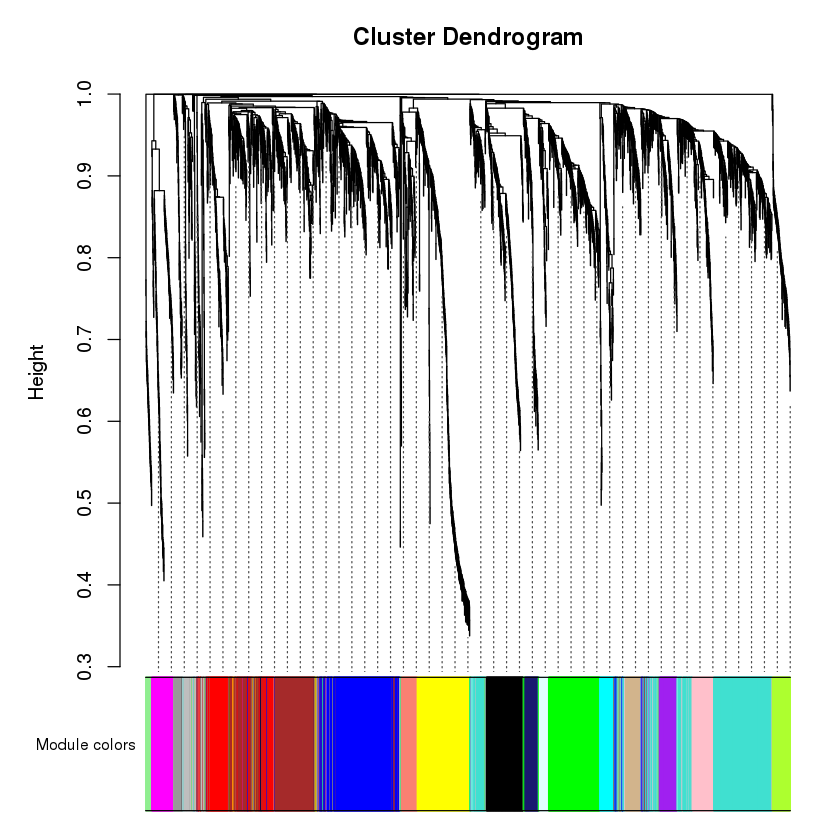

In [59]:
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
        "Module colors",
        dendroLabels = FALSE, hang = 0.03,
        addGuide = TRUE, guideHang = 0.05)

# Step-by-Step

In [60]:
#* 计算network adjacencies  
softPower = 6;
adjacency = adjacency(datExpr, power = softPower);

In [61]:
# Turn adjacency into topological overlap
TOM = TOMsimilarity(adjacency);
dissTOM = 1-TOM


..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [62]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");
# Plot the resulting clustering tree (dendrogram)
sizeGrWindow(12,9)

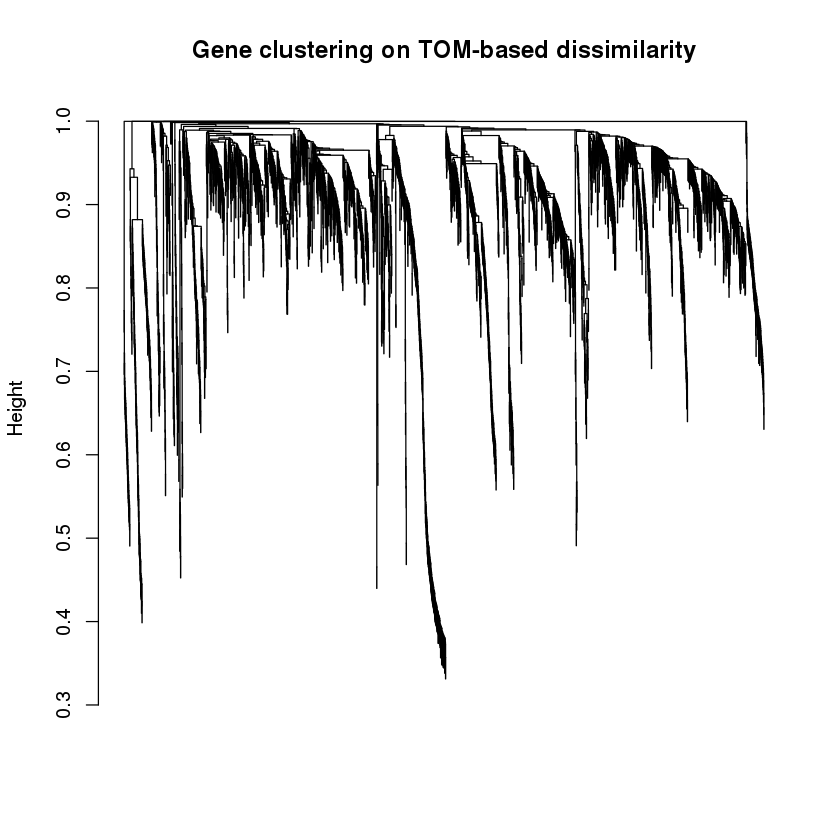

In [63]:
plot(geneTree, xlab="", sub="", main = "Gene clustering on TOM-based dissimilarity",
labels = FALSE, hang = 0.04);

In [64]:
minModuleSize = 30;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
deepSplit = 2, pamRespectsDendro = FALSE,
minClusterSize = minModuleSize);
table(dynamicMods)


 ..cutHeight not given, setting it to 0.996  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 88 614 316 311 257 235 225 212 158 153 121 106 102 100  94  91  78  76  65  58 
 20  21  22 
 58  48  34 

In [65]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)


In [69]:
MEList = moduleEigengenes(datExpr, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");


In [71]:
MEDissThres = 0.25

# Call an automatic merging function
merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 23 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 19 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 19 module eigengenes in given set.


# Block-wise

In [73]:
bwnet <- blockwiseModules(datExpr,
    maxBlockSize = 2000,
    power = 6, TOMType = "unsigned", minModuleSize = 30,
    reassignThreshold = 0, mergeCutHeight = 0.25,
    numericLabels = TRUE,
    saveTOMs = TRUE,
    saveTOMFileBase = "femaleMouseTOM-blockwise",
    verbose = 3
)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
Cluster size 3600 broken into 2108 1492 
Cluster size 2108 broken into 1126 982 
Done cluster 1126 
Done cluster 982 
Done cluster 2108 
Done cluster 1492 
 ....pre-clustering genes to determine blocks..
   Projective K-means:
  projectiveKMeans: imputing missing data in 'datExpr'.
To reproduce older results, use 'imputeMissing = FALSE'. 
Cluster size 3600 broken into 2108 1492 
Cluster size 2108 broken into 1126 982 
Done cluster 1126 
Done cluster 982 
Done cluster 2108 
Done cluster 1492 
   ..k-means clustering..
   ..merging smaller clusters...
Block sizes:
gBlocks
   1    2 
1869 1731 
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will use 19 parallel threads.
     Fraction of slow calculations: 0.385244
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into

In [86]:
table(bwnet$color)


  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
148 538 474 448 305 270 210 142 142 130 120 110  98  88  81  78  77  65  42  34 

In [88]:
str(bwnet)

List of 10
 $ colors        : Named num [1:3600] 0 3 3 18 6 2 5 9 6 3 ...
  ..- attr(*, "names")= chr [1:3600] "MMT00000044" "MMT00000046" "MMT00000051" "MMT00000076" ...
 $ unmergedColors: Named num [1:3600] 0 1 1 14 8 17 2 21 5 1 ...
  ..- attr(*, "names")= chr [1:3600] "MMT00000044" "MMT00000046" "MMT00000051" "MMT00000076" ...
 $ MEs           :'data.frame':	134 obs. of  20 variables:
  ..$ ME10: num [1:134] -0.020417 -0.005045 0.593164 -0.031342 -0.000574 ...
  ..$ ME6 : num [1:134] 0.00839 0.06923 0.0617 -0.06652 0.06696 ...
  ..$ ME5 : num [1:134] 0.00122 0.07123 0.05972 0.0488 0.01433 ...
  ..$ ME17: num [1:134] -0.0223 0.0897 0.1234 0.0347 0.0253 ...
  ..$ ME3 : num [1:134] 0.0329 0.0301 0.1974 -0.0343 0.0697 ...
  ..$ ME13: num [1:134] -0.0225 0.0323 0.0431 0.0905 0.0608 ...
  ..$ ME2 : num [1:134] -0.1369 -0.0426 0.0237 -0.0262 0.0865 ...
  ..$ ME1 : num [1:134] -0.0768 -0.0123 -0.0256 0.0637 0.0471 ...
  ..$ ME9 : num [1:134] -0.0968 0.1465 -0.1081 0.1366 -0.0466 ...
  ..$ 

# Export data for Cytoscape

In [109]:
#! 基于构建网络时得到的结果
load(file = "femaleMouseTOM-blockwise-block.1.RData")

In [140]:
cor.test(
    datExpr[,c('MMT00000046')],
    datExpr[,c('MMT00001434')],
)


	Pearson's product-moment correlation

data:  datExpr[, c("MMT00000046")] and datExpr[, c("MMT00001434")]
t = -12.857, df = 132, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8125099 -0.6594757
sample estimates:
       cor 
-0.7456689 


In [100]:
#* 重新计算比较耗时
TOM = TOMsimilarityFromExpr(datExpr, power = 6);

TOM calculation: adjacency..
..will use 19 parallel threads.
 Fraction of slow calculations: 0.348478
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [121]:
exportNetworkToCytoscape(
    TOM, edgeFile = "edges1.txt",
     nodeFile = "node1.txt", 
     weighted = TRUE, 
     threshold = 0.02,
     nodeNames = names(datExpr[,bwnet$blockGenes[[1]]])
     )

fromNode,toNode,weight,direction,fromAltName,toAltName
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
MMT00000044,MMT00002529,0.04328167,undirected,NA,NA
MMT00000044,MMT00009488,0.03291436,undirected,NA,NA
MMT00000044,MMT00013951,0.02129401,undirected,NA,NA
MMT00000044,MMT00027142,0.02166325,undirected,NA,NA
MMT00000044,MMT00036477,0.04920858,undirected,NA,NA
MMT00000044,MMT00045174,0.03507913,undirected,NA,NA
MMT00000044,MMT00047445,0.02001821,undirected,NA,NA
MMT00000044,MMT00057054,0.03844596,undirected,NA,NA
MMT00000044,MMT00064954,0.03079411,undirected,NA,NA


# 使用自己的数据进行测试-实战


In [ ]:
#-----------------------------------------------------
#TODO 数据清洗和筛选power
#* 对数据进行转置
#-----------------------------------------------------
datExpre=read.table(
    "/cotton/Liuzhenping/parallel_selection/TWAS_genes/filterExpression/At_12DPA_filter.txt",
    row.names = 1,
    header = 1
)
datExpre=t(datExpre)
#TODO 缺失值处理
gsg = goodSamplesGenes(datExpre, verbose = 3);
#* 如果值为TRUE则表示所有基因都pass了
gsg$allOK 

In [ ]:
#* 根据基因表达对样本进行聚类
sampleTree = hclust(dist(datExpre), method = "average");

In [ ]:
sizeGrWindow(12,9)
#pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))



In [ ]:
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
cex.axis = 1.5, cex.main = 2) 

In [ ]:
#* 剔除异常样本
clust = cutreeStatic(sampleTree, cutHeight = 8000, minSize = 10)
keepSamples = (clust==1)
datExpre_filter = datExpre[keepSamples, ]

In [ ]:
#* 开启多线程
enableWGCNAThreads() 
#* 对于每个阈值，分别调用拓扑分析函数
powers = c(seq(4,10,by=1), seq(12,20, by=2));
sft = pickSoftThreshold(datExpre_filter, powerVector = powers, verbose = 5)
sizeGrWindow(9, 5)
par(mfrow = c(1,2));
cex1 = 0.9;
#* 执行垃圾回收，防止内存溢出
collectGarbage();

In [ ]:
#* 绘制图，选择相应的power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

addGrid();

In [ ]:
#* 保存筛选后数据
save(datExpre_filter,file='At_12DPA-dataInput.RData')

In [ ]:
#------------------------------------------
#* 命令行运行WGCNA脚本
#------------------------------------------
Rscript  coExpression.R At_12DPA-dataInput.RData 8 A2_12DPA 10